In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from scipy import stats


import wrangle as w
import explore as e
#import modeling as m

In [2]:
telco_unclean = w.get_telco_data()

In [3]:
telco_unclean.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
telco_unclean.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [5]:
telco = w.clean_telco(telco_unclean)

In [6]:
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,churn_encoded
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,One year,DSL,Mailed check,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,Month-to-month,DSL,Mailed check,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Month-to-month,Fiber optic,Electronic check,1
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Month-to-month,Fiber optic,Electronic check,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Month-to-month,Fiber optic,Mailed check,1


In [7]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
churn_encoded,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


In [8]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7032 non-null   object 
 1   senior_citizen         7032 non-null   int64  
 2   partner                7032 non-null   object 
 3   dependents             7032 non-null   object 
 4   tenure                 7032 non-null   int64  
 5   phone_service          7032 non-null   object 
 6   multiple_lines         7032 non-null   object 
 7   online_security        7032 non-null   object 
 8   online_backup          7032 non-null   object 
 9   device_protection      7032 non-null   object 
 10  tech_support           7032 non-null   object 
 11  streaming_tv           7032 non-null   object 
 12  streaming_movies       7032 non-null   object 
 13  paperless_billing      7032 non-null   object 
 14  monthly_charges        7032 non-null   float64
 15  tota

In [9]:
train, validate, test = w.train_validate_test_split(telco, "churn_encoded")

In [10]:
train.shape, validate.shape, test.shape

((4572, 20), (1405, 20), (1055, 20))

In [11]:
def split_churn(train):
    #split data for exploration into a dataframe that shows all info on those who churned
    train_churn = train[train.churn_encoded == 1]

    #and a dataframe that show all info on those who didn't churn
    train_no_churn = train[train.churn_encoded == 0]

    return train_churn, train_no_churn


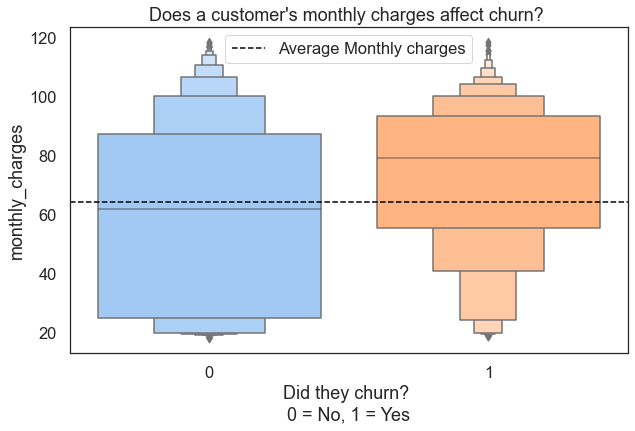

In [98]:
#split data for plotting
train_churn, train_no_churn = split_churn(train)

#increase font size
sns.set(font_scale=1.5)
#set plot style
sns.set_style('white')

#set size of the graphs
fig, ax = plt.subplots(1,1, figsize=(10,6))

#plot boxenplot to compare monthly charges with churn
average = train["monthly_charges"].mean()
sns.boxenplot(data=train, x='churn_encoded', y="monthly_charges", palette='pastel', saturation=1)
plt.title("Does a customer's monthly charges affect churn? ")
plt.axhline(average, ls='--', color='black', label= 'Average Monthly charges') 
plt.xlabel(xlabel="Did they churn? \n0 = No, 1 = Yes")
plt.legend(loc='upper center', frameon=True)
plt.show()

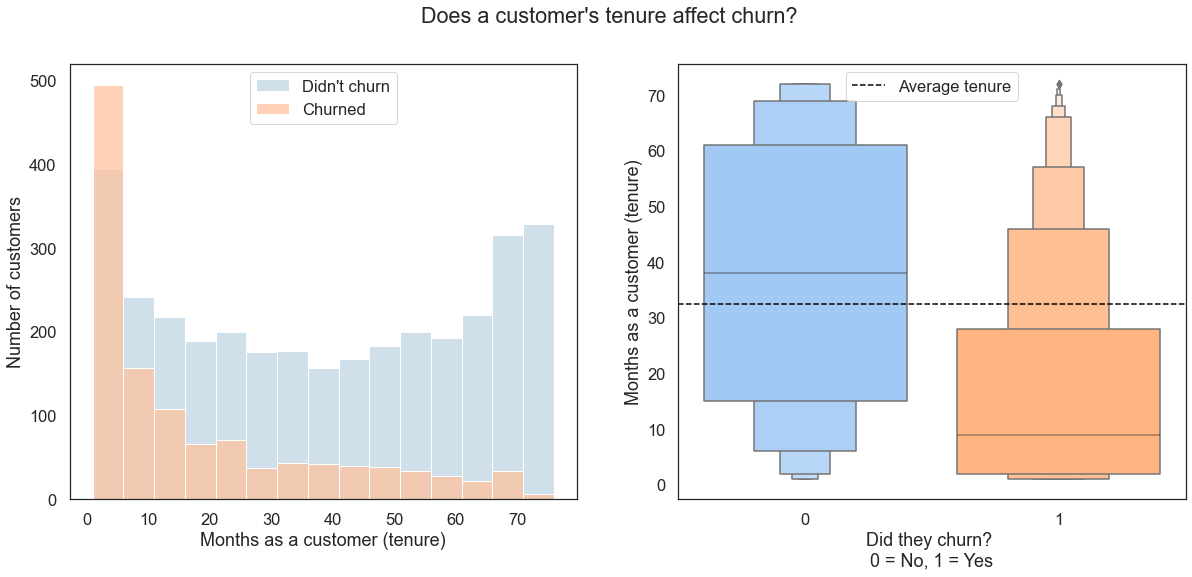

In [99]:
#split data for plotting histogram
#train_churn, train_no_churn = split_churn(df)

#increase font size
sns.set(font_scale=1.5)
sns.set_style('white')

#set size of the graphs
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

#set figure title
fig.suptitle("Does a customer's tenure affect churn?")

#plot churn and no churn histogram on top of each other
sns.histplot(train_no_churn, x='tenure', ax=ax1, binwidth=5, label = "Didn't churn", color='#c0d6e4')
sns.histplot(train_churn, x='tenure', ax=ax1, binwidth=5, label = "Churned", color='#ffc3a0')
ax1.set_ylabel(ylabel='Number of customers')
ax1.set_xlabel(xlabel="Months as a customer (tenure)")
ax1.legend(loc='upper center', frameon=True)

#plot boxenplot to compare tenure with churn
average = train["tenure"].mean()
sns.boxenplot(data=train, x='churn_encoded', y="tenure", palette='pastel', saturation=1, ax=ax2)
ax2.set_xlabel(xlabel="Did they churn? \n0 = No, 1 = Yes")
ax2.set_ylabel(ylabel="Months as a customer (tenure)")
ax2.axhline(average, ls='--', color='black', label='Average tenure') 
ax2.legend(loc='upper center', frameon=True)
plt.show()


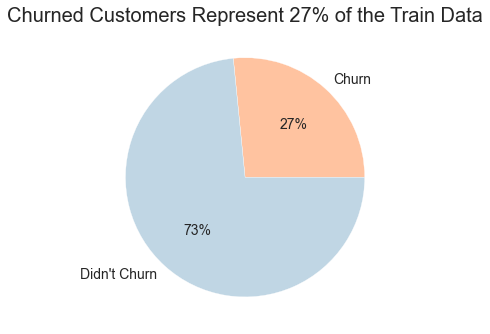

In [74]:
train_churn, train_no_churn = split_churn(train)

#create the percentages
values = [len(train_churn.churn_encoded), len(train_no_churn.churn_encoded)] 

# generate and show pie chart
plt.style.use('seaborn')
plt.pie(values, labels=["Churn", "Didn't Churn"] , autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4'], textprops={'fontsize': 14})
plt.title('Churned Customers Represent 27% of the Train Data', size=20)
plt.show()

In [37]:
train.columns.tolist()

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_encoded']

------------------------------------
-----------NUMERICAL DATA-----------
senior_citizen
count    5273.000000
mean        0.163474
std         0.369833
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen, dtype: float64


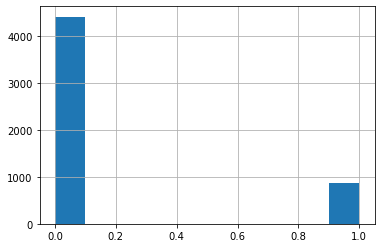

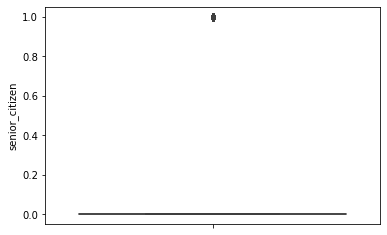

tenure
count    5273.000000
mean       32.457994
std        24.612578
min         1.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


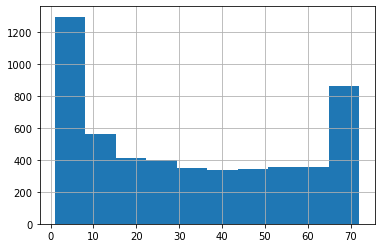

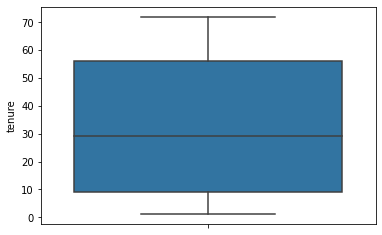

monthly_charges
count    5273.000000
mean       64.590888
std        30.119472
min        18.250000
25%        35.200000
50%        70.150000
75%        89.800000
max       118.650000
Name: monthly_charges, dtype: float64


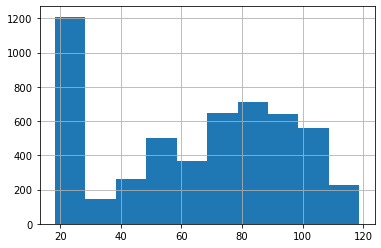

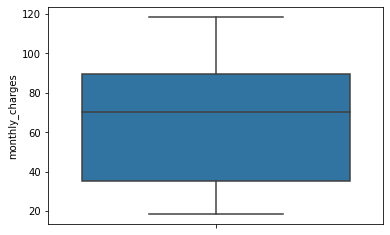

total_charges
count    5273.000000
mean     2280.377299
std      2273.931466
min        18.800000
25%       394.850000
50%      1388.450000
75%      3801.300000
max      8670.100000
Name: total_charges, dtype: float64


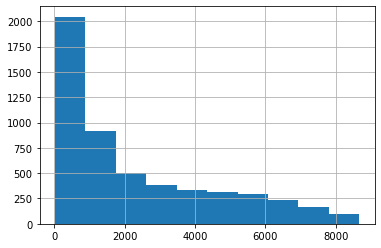

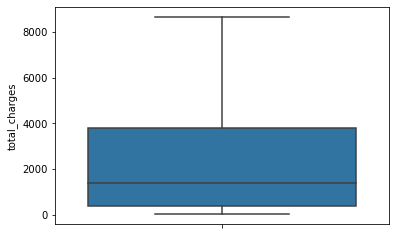

churn_encoded
count    5273.000000
mean        0.265883
std         0.441844
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn_encoded, dtype: float64


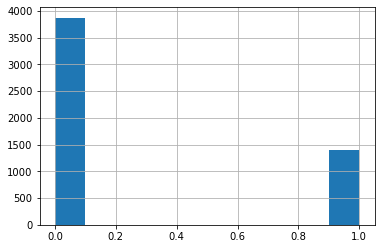

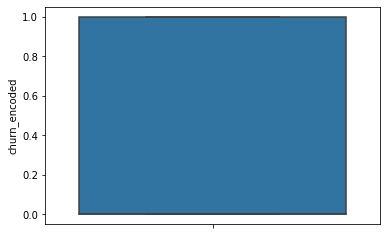

------------------------------------
---------CATEGORICAL DATA-----------
gender
Male      2658
Female    2615
Name: gender, dtype: int64
Male      50.407738
Female    49.592262
Name: gender, dtype: float64


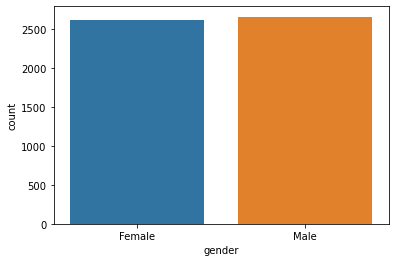

partner
No     2754
Yes    2519
Name: partner, dtype: int64
No     52.228333
Yes    47.771667
Name: partner, dtype: float64


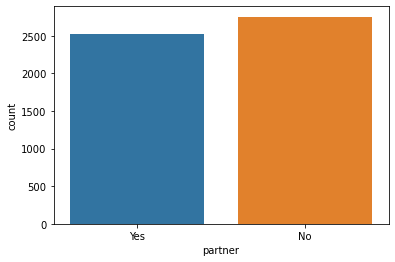

dependents
No     3702
Yes    1571
Name: dependents, dtype: int64
No     70.206713
Yes    29.793287
Name: dependents, dtype: float64


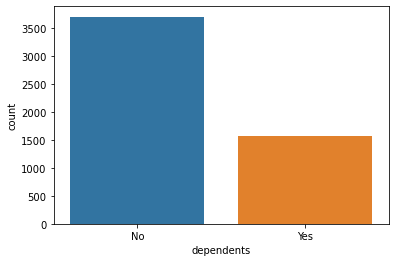

phone_service
Yes    4764
No      509
Name: phone_service, dtype: int64
Yes    90.347051
No      9.652949
Name: phone_service, dtype: float64


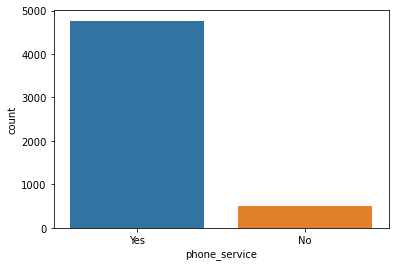

multiple_lines
No                  2547
Yes                 2217
No phone service     509
Name: multiple_lines, dtype: int64
No                  48.302674
Yes                 42.044377
No phone service     9.652949
Name: multiple_lines, dtype: float64


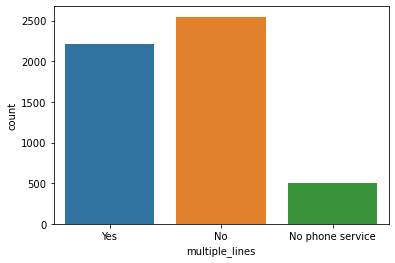

online_security
No                     2632
Yes                    1490
No internet service    1151
Name: online_security, dtype: int64
No                     49.914660
Yes                    28.257159
No internet service    21.828181
Name: online_security, dtype: float64


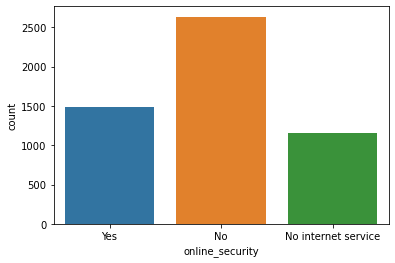

online_backup
No                     2310
Yes                    1812
No internet service    1151
Name: online_backup, dtype: int64
No                     43.808079
Yes                    34.363740
No internet service    21.828181
Name: online_backup, dtype: float64


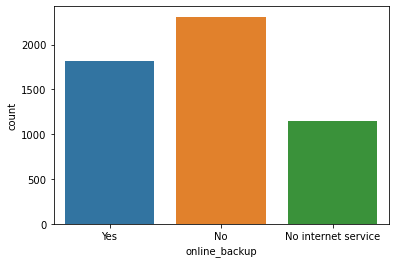

device_protection
No                     2339
Yes                    1783
No internet service    1151
Name: device_protection, dtype: int64
No                     44.358050
Yes                    33.813768
No internet service    21.828181
Name: device_protection, dtype: float64


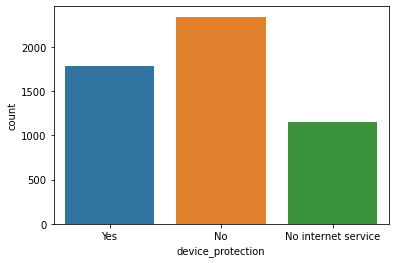

tech_support
No                     2622
Yes                    1500
No internet service    1151
Name: tech_support, dtype: int64
No                     49.725014
Yes                    28.446804
No internet service    21.828181
Name: tech_support, dtype: float64


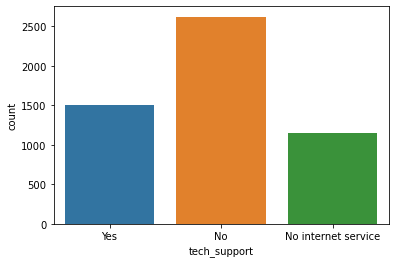

streaming_tv
No                     2114
Yes                    2008
No internet service    1151
Name: streaming_tv, dtype: int64
No                     40.091030
Yes                    38.080789
No internet service    21.828181
Name: streaming_tv, dtype: float64


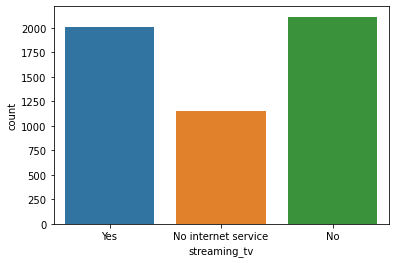

streaming_movies
No                     2091
Yes                    2031
No internet service    1151
Name: streaming_movies, dtype: int64
No                     39.654845
Yes                    38.516973
No internet service    21.828181
Name: streaming_movies, dtype: float64


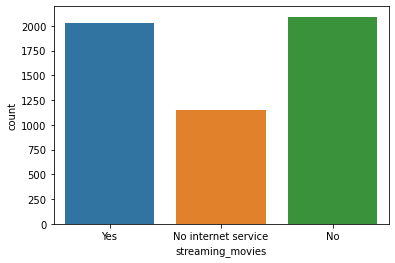

paperless_billing
Yes    3105
No     2168
Name: paperless_billing, dtype: int64
Yes    58.884885
No     41.115115
Name: paperless_billing, dtype: float64


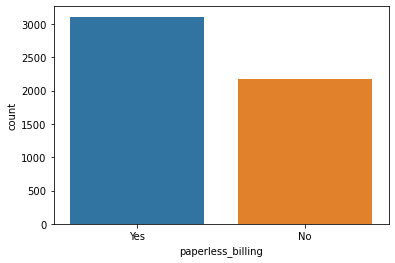

contract_type
Month-to-month    2911
Two year          1261
One year          1101
Name: contract_type, dtype: int64
Month-to-month    55.205765
Two year          23.914280
One year          20.879954
Name: contract_type, dtype: float64


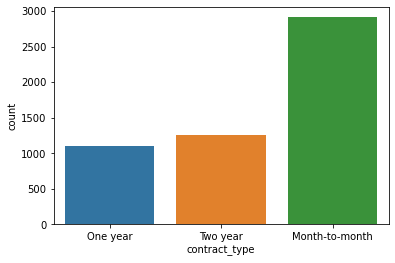

internet_service_type
Fiber optic    2322
DSL            1800
None           1151
Name: internet_service_type, dtype: int64
Fiber optic    44.035653
DSL            34.136165
None           21.828181
Name: internet_service_type, dtype: float64


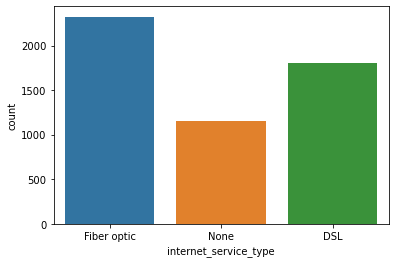

payment_type
Electronic check             1771
Mailed check                 1191
Bank transfer (automatic)    1157
Credit card (automatic)      1154
Name: payment_type, dtype: int64
Electronic check             33.586194
Mailed check                 22.586763
Bank transfer (automatic)    21.941969
Credit card (automatic)      21.885075
Name: payment_type, dtype: float64


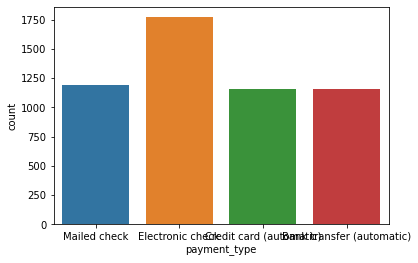

In [11]:
e.explore_uvar(train)

------------------------------------
-----------NUMERICAL DATA-----------


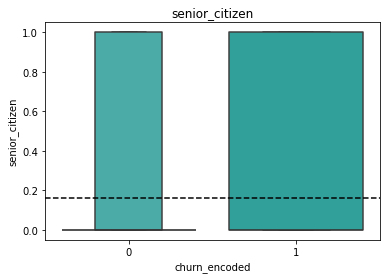

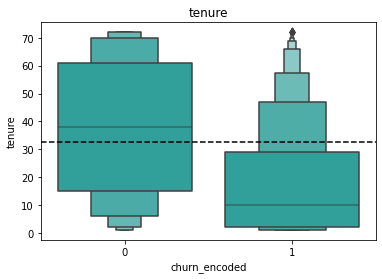

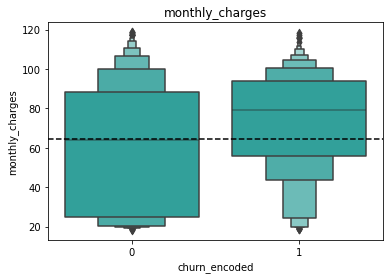

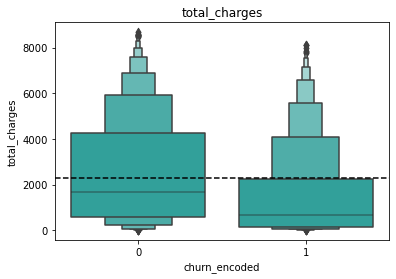

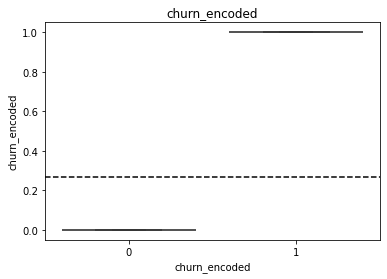

------------------------------------
---------CATEGORICAL DATA-----------


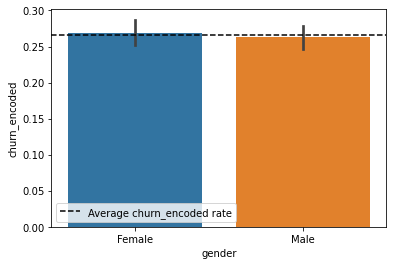

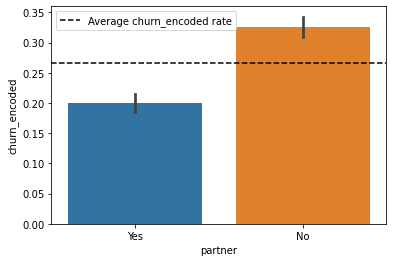

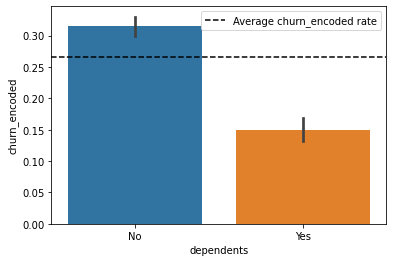

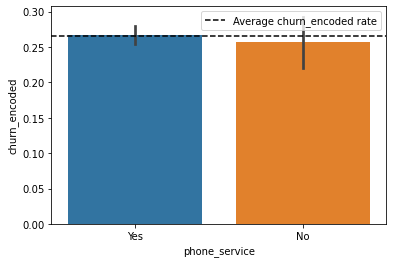

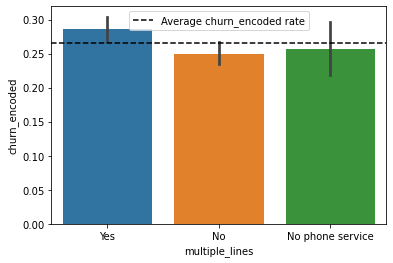

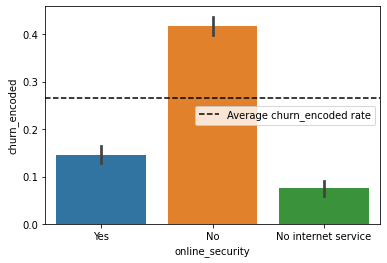

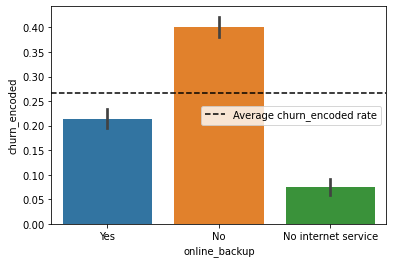

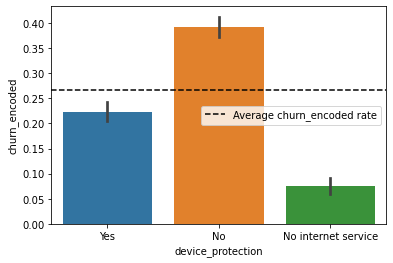

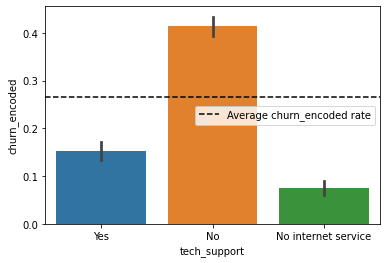

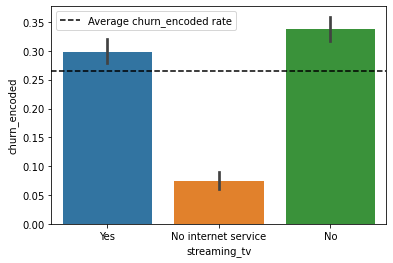

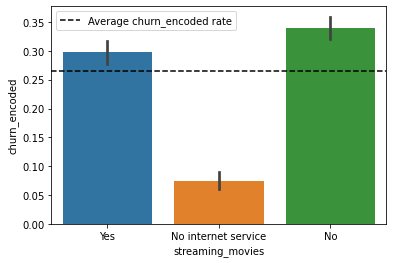

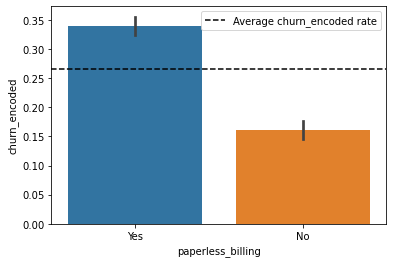

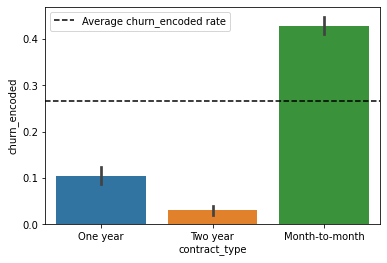

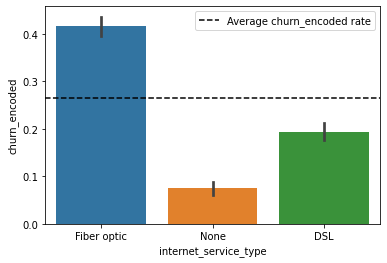

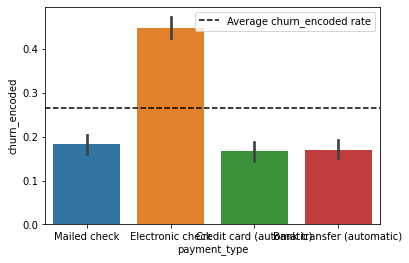

In [15]:
e.explore_bvar(train, 'churn_encoded')

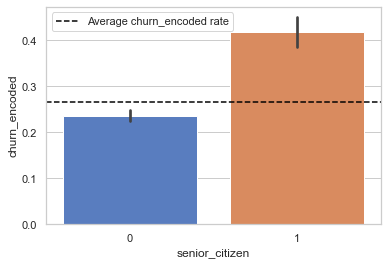

In [33]:
sns.barplot(x="senior_citizen", y="churn_encoded", data=train)
rate = train["churn_encoded"].mean()
plt.axhline(rate, label = f'Average churn_encoded rate', linestyle='--', color='black')
plt.legend()
plt.show()

In [25]:
cat_vars = list(train.select_dtypes(exclude=np.number).columns)
num_vars = list(train.select_dtypes(include=np.number).columns)

In [26]:
plot_all_continuous_vars(train, "churn_encoded", num_vars)

ValueError: Per-column arrays must each be 1-dimensional

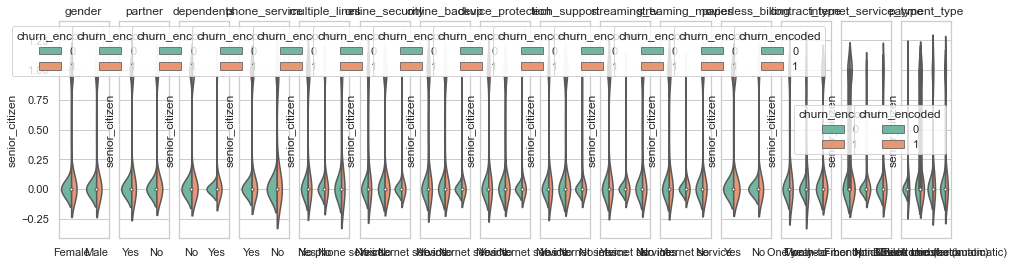

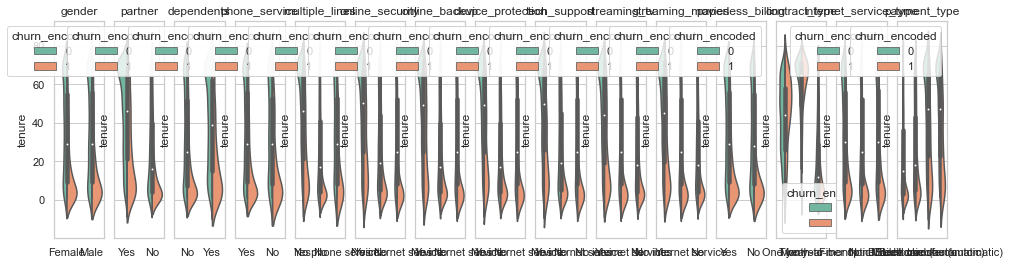

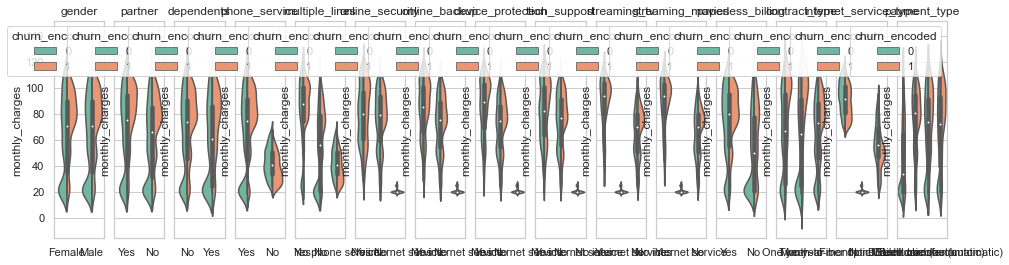

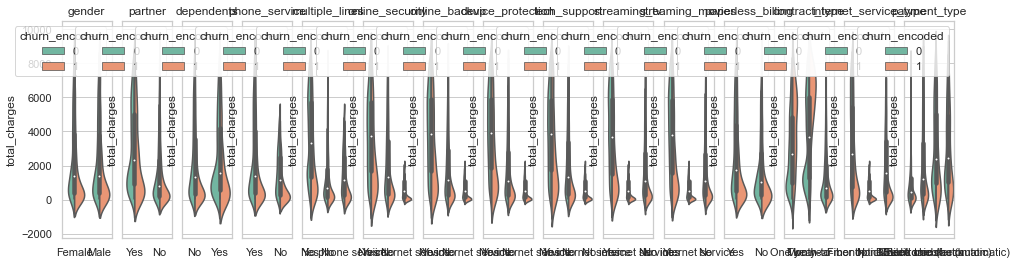

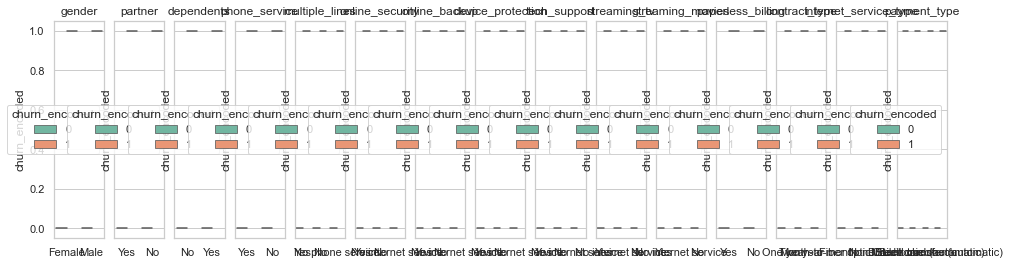

In [27]:
cols = len(cat_vars)
_, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
for i, cat in enumerate(cat_vars):
    sns.violinplot(x=cat, y=quant, data=train, split=True, 
                   ax=ax[i], hue=target, palette="Set2")
    ax[i].set_xlabel('')
    ax[i].set_ylabel(quant)
    ax[i].set_title(cat)
plt.show()

In [34]:
r, p = stats.pearsonr(train.total_charges, train.tenure)

In [35]:
r, p

(0.8257511481838654, 0.0)

In [36]:
alpha = 0.05

if (p < alpha):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

we can reject the null hypothesis


In [46]:
def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

In [51]:
run_chi2(train, "multiple_lines", "churn_encoded")

(       chi2   p-value  degrees of freedom
 0  8.396108  0.015025                   2,
 churn_encoded        0    1
 multiple_lines             
 No                1911  636
 No phone service   378  131
 Yes               1582  635,
              0           1
 0  1869.796511  677.203489
 1   373.665655  135.334345
 2  1627.537834  589.462166)

## Model

In [1]:
import sklearn.metrics as met
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from scipy import stats


import wrangle as w
import explore as e
#import modeling as m

In [2]:
def get_dumdum(df):
    catcol = list(df.select_dtypes(exclude=np.number).columns)
    dummy_df = pd.get_dummies(df[catcol], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df

def prep_for_model(train, validate, test, target, drivers):
    '''
    Takes in train, validate, and test data frames
    then splits  for X (all variables but target variable) 
    and y (only target variable) for each data frame
    '''
    train = get_dumdum(train[drivers])
    validate = get_dumdum(validate[drivers])
    test = get_dumdum(test[drivers])
    
    drop_columns = list(train.select_dtypes(exclude=np.number).columns) + [target]

    X_train = train.drop(columns=drop_columns)
    y_train = train[target]

    X_validate = validate.drop(columns=drop_columns)
    y_validate = validate[target]

    X_test = test.drop(columns=drop_columns)
    y_test = test[target]

    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [3]:
telco_unclean = w.get_telco_data()

telco = w.clean_telco(telco_unclean)

train, validate, test = w.train_validate_test_split(telco, "churn_encoded")

In [4]:
drivers =['churn_encoded', 'contract_type', 'monthly_charges', 'tenure']

In [5]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prep_for_model(train, validate, test, "churn_encoded", drivers)

In [6]:
X_train.head()

,monthly_charges,tenure,contract_type_One year,contract_type_Two year
22,83.75,23,0,0
4999,59.60,47,0,1
2563,39.70,19,0,0
5501,35.75,28,0,0
4344,53.95,41,0,0


In [7]:
baseline = y_train.value_counts(normalize=True).max()
print(f'Baseline accuracy: {baseline:.2%}')

Baseline accuracy: 73.43%


## Decision Tree

In [19]:
# create classifier object
clf = DecisionTreeClassifier(max_depth=3, random_state=27)

#fit model on training data
clf.fit(X_train, y_train)

print(f"Train Accuracy: {clf.score(X_train, y_train)}", '\n')
print(f"Validate Accuracy: {clf.score(X_validate, y_validate)}", '\n')

Train Accuracy: 0.7876202974628171 

Validate Accuracy: 0.7864768683274022 



## Random Forest

In [13]:
# create classifier object
rf = RandomForestClassifier(random_state=27)

#fit model on training data
rf.fit(X_train, y_train)

print(f"Train Accuracy: {rf.score(X_train, y_train)}", '\n')
print(f"Validate Accuracy: {rf.score(X_validate, y_validate)}", '\n')

Train Accuracy: 0.9831583552055994 

Validate Accuracy: 0.7679715302491104 



## KNN

In [14]:
# create classifier object
knn = KNeighborsClassifier()

#fit model on training data
knn.fit(X_train, y_train)

print(f"Train Accuracy: {knn.score(X_train, y_train)}", '\n')
print(f"Validate Accuracy: {knn.score(X_validate, y_validate)}", '\n')

Train Accuracy: 0.8396762904636921 

Validate Accuracy: 0.7558718861209964 



## Logistic Regression

In [15]:
# create classifier object
logit = LogisticRegression(random_state=27)

#fit model on training data
logit.fit(X_train, y_train)

print(f"Train Accuracy: {logit.score(X_train, y_train)}", '\n')
print(f"Validate Accuracy: {logit.score(X_validate, y_validate)}", '\n')

Train Accuracy: 0.7874015748031497 

Validate Accuracy: 0.7886120996441282 



## Random Forest

In [47]:
rf = RandomForestClassifier(random_state=27)

#fit model on training data
rf.fit(X_train, y_train)

#get my predictions based off X_train and fit model
y_pred = rf.predict(X_train)

TN, FP, FN, TP = met.confusion_matrix(y_train, y_pred).ravel()
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')

Accuracy: 0.873578302712161 

True Positive Rate/Sensitivity/Recall/Power: 0.7061728395061728 



In [48]:
#get my predictions based off X_train and fit model
y_pred = rf.predict(X_validate)

TN, FP, FN, TP = met.confusion_matrix(y_validate, y_pred).ravel()
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')

Accuracy: 0.701067615658363 

True Positive Rate/Sensitivity/Recall/Power: 0.44919786096256686 



## KNN

In [49]:
knn = KNeighborsClassifier()

#fit model on training data
knn.fit(X_train, y_train)

#get my predictions based off X_train and fit model
y_pred = knn.predict(X_train)

TN, FP, FN, TP = met.confusion_matrix(y_train, y_pred).ravel()
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')

Accuracy: 0.8127734033245845 

True Positive Rate/Sensitivity/Recall/Power: 0.5580246913580247 



In [50]:
#get my predictions based off X_train and fit model
y_pred = knn.predict(X_validate)

TN, FP, FN, TP = met.confusion_matrix(y_validate, y_pred).ravel()
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')

Accuracy: 0.7224199288256228 

True Positive Rate/Sensitivity/Recall/Power: 0.44385026737967914 



## Logistic regression

In [51]:
logit = LogisticRegression(random_state=27)

#fit model on training data
logit.fit(X_train, y_train)

#get my predictions based off X_train and fit model
y_pred = logit.predict(X_train)

TN, FP, FN, TP = met.confusion_matrix(y_train, y_pred).ravel()
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')

Accuracy: 0.7458442694663167 

True Positive Rate/Sensitivity/Recall/Power: 0.36049382716049383 



In [52]:
#get my predictions based off X_train and fit model
y_val_pred = logit.predict(X_validate)

TN, FP, FN, TP = met.confusion_matrix(y_validate, y_val_pred).ravel()
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')

Accuracy: 0.7352313167259786 

True Positive Rate/Sensitivity/Recall/Power: 0.3770053475935829 



In [46]:
########### DECICSION TREE HYPERPARAMETER TESTING####################

# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metric = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metric.append(output)
    
df = pd.DataFrame(metric)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734252,0.733808,0.000444
1,2,0.734252,0.733808,0.000444
2,3,0.754374,0.739502,0.014873
3,4,0.758530,0.743060,0.015470
4,5,0.759624,0.743060,0.016563
5,6,0.763342,0.746619,0.016723
6,7,0.767498,0.744484,0.023014
7,8,0.770997,0.738790,0.032207
8,9,0.778653,0.746619,0.032033
9,10,0.784996,0.742349,0.042647


In [8]:
telco.columns.tolist()

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_encoded']

## Data dictionary
| Feature | Definition | Values |
|:--------|:-----------|:-------
|gender| The customer's gender| Male or Female|
|senior_citizen| Is this customer a senior citizen?| {'Yes': 1, 'No': 0} |
|partner| Does this person live with a partner?|'Yes' or 'No'|
|dependents| Does this person live with dependents?| 'Yes' or 'No'|
|tenure| The number of **months** a customer has been with the company| *float* |
|phone_service| Does this person subscribe to phone service?| 'Yes', 'No'|
|multiple_lines| Does this person have multiple phone lines?| 'Yes', 'No', 'No phone service'|
|online_security| Does this person subscribe to online security?| 'Yes', 'No', 'No internet service'|
|online_backup| Does this person subscribe to online backup?| 'Yes', 'No', 'No internet service'
|device_protection| Does this person subscribe to device protection?| 'Yes', 'No', 'No internet service'
|tech_support| Does this person subscribe to tech support?| 'Yes', 'No', 'No internet service'
|streaming_tv| Does this person subscribe to streaming TV?| 'Yes', 'No', 'No internet service'
|streaming_movies| Does this person subscribe to streaming movies?| 'Yes', 'No', 'No internet service'
|paperless_billing| Does this person use paperless billing?| 'Yes', 'No'
|monthly_charges| The amount a customer is currently charged per month| *float* |
|total_charges| The amount a customer has been charged since becoming a customer| *float* |
|contract_type| The length of contract the customer currently has| 'Month-to-month', 'One-year', or 'Two-year'|
|internet_service_type| Type of internet service | 'DSL', 'Fiber', 'None'|
|payment_type| The way the customer pays their bill. |'Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'
|**Target variable**
|churn_encoded| Did the customer leave the company? | {'Yes': 1, 'No': 0}|

In [9]:
telco.payment_type.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)